# Introdução a AutoML com Python

O aprendizado de máquina automatizado é o processo de automatizar o processo de aplicação do aprendizado de máquina a problemas do mundo real (Wikipedia). 

## Sumário:
* [Hypertopt-sklearn](#hyperopt-sklearn)
* [Auto-sklearn](#auto-sklearn)
* [AutoKeras](#autokeras)
* [TPOT](#tpot)
* [H2O AutoML](#h2oautoml)
* [PyCaret](#pycaret)

## Imports gerais

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf

In [ ]:
print(pd.__version__)

0.25.3


## Hyperopt-sklearn  <a class="anchor" id="hyperopt-sklearn"></a>

http://hyperopt.github.io/hyperopt-sklearn/

In [ ]:
# Rodar comandos no terminal:
#git clone https://github.com/hyperopt/hyperopt-sklearn.git
#cd hyperopt
#pip install -e .

Nem todos os classificadores do sklearn tem suporte a dados esparsos. Para facilitar, o hyperopt-sklearn vem com o metódo any_sparse_classifier que seleciona apenas os classificadores disponíveis que aceitam dados esparsos.

In [ ]:
from hpsklearn import HyperoptEstimator, any_sparse_classifier, tfidf
from sklearn.datasets import fetch_20newsgroups
from sklearn import metrics
from hyperopt import tpe
import numpy as np

# Download the data and split into training and test sets

train = fetch_20newsgroups(subset='train' )
test = fetch_20newsgroups(subset='test' )
X_train = np.array(train.data)
y_train = np.array(train.target)
X_test = np.array(test.data)
y_test = np.array(test.target)

estim = HyperoptEstimator(
    classifier=any_sparse_classifier('clf'), 
    preprocessing=[tfidf('tfidf')],
    algo=tpe.suggest, trial_timeout=300
)

WARN: OMP_NUM_THREADS=None =>
... If you are using openblas if you are using openblas set OMP_NUM_THREADS=1 or risk subprocess calls hanging indefinitely


In [ ]:
estim.fit( X_train, y_train )

 80%|████████  | 4/5 [00:00<?, ?trial/s, best loss=?]

/home/andrade/automl/automlenv/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "



 83%|████████▎ | 5/6 [00:00<?, ?trial/s, best loss=?]

/home/andrade/automl/automlenv/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "



 88%|████████▊ | 7/8 [00:00<?, ?trial/s, best loss=?]

/home/andrade/automl/automlenv/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "



 90%|█████████ | 9/10 [00:00<?, ?trial/s, best loss=?]

/home/andrade/automl/automlenv/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "



100%|██████████| 10/10 [01:46<00:00, 106.17s/trial, best loss: 0.08749447635881569]


/home/andrade/automl/automlenv/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [ ]:
print( estim.score( X_test, y_test ) )

print( estim.best_model() )

0.8317843866171004
{'learner': LinearSVC(C=0.5081680106977093, class_weight='balanced', dual=False,
          intercept_scaling=0.4846996167140823, multi_class='crammer_singer',
          penalty='l1', random_state=2, tol=0.0005836615248717465,
          verbose=False), 'preprocs': (TfidfVectorizer(binary=True, ngram_range=(1, 2), norm=None, smooth_idf=False,
                stop_words='english', use_idf=False),), 'ex_preprocs': ()}


## Auto-sklearn <a class="anchor" id="auto-sklearn"></a>

Auto-sklearn libera o usuário de machine learning da seleção de algoritmos e tuning de hiperparâmetros. Ele traz recentes avanços em otimização bayesiana, meta-learning e ensemble. (https://automl.github.io/auto-sklearn/master/)

Obs.: parte dessa seção do Auto-sklearn foi inspirada na apresentação do Professor Leonardo Cesar na Python Brasil 2018(https://www.youtube.com/watch?v=nuRDxYF_35A).

In [ ]:
#!apt-get install build-essential swig

In [ ]:
#!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip3 install

In [ ]:
#!pip3 install auto-sklearn

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
print("X_train")
print(X_train)

X_train
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


9


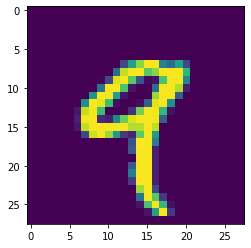

In [ ]:
print(y_train[4])
plt.imshow(X_train[4]);

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
X_train = X_train.reshape((X_train.shape[0], 28 * 28))
X_test = X_test.reshape((X_test.shape[0], 28 * 28))

In [ ]:
print("X_train")
print(X_train)

X_train
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
X_train.shape

(60000, 784)

In [ ]:
X_test.shape

(10000, 784)

In [ ]:
print("y_train")
print(y_train)

y_train
[5 0 4 ... 5 6 8]



A abordagem AutoML que estamos estudando aqui está tentando resolver um problema conhecido como CASH (seleção e configuração de hiperparâmetros combinada de algoritmos, do inglês combined algorithm selection and hyperparameter configuration).

Este problema lida com duas questões ao mesmo tempo:

- qual o melhor algoritmo para o meu problema?  
- como ele pode ser configurado para apresentar a melhor performance possível no meu problema?  

Lidar com essas duas questões ao mesmo tempo é o que permite que o AutoSklearn identifique um modelo que já é configurado e que se espera que tenha uma boa performance no problema de entrada.

Para isso, nós precisamos fornecer um setup para o AutoSklearn rodar. Nós fazemos isso através dos parâmetros do construtor da classe AutoSklearnClassifier.

Vamos ver alguns dos mais importantes:

- time_left_for_this_task: o tempo total que o AutoSklearn terá pra selecionar/configurar algoritmos. Em geral, isso depende de quais algoritmos você permite que o AutoSklearn teste e de quando tempo eles levam pra rodar no seu problema. Na prática, o tempo total deve permitir que o AutoSklearn rode pelo menos 1000 experiments (testar 1000 algoritmos/configurações diferentes).
- per_run_time_limit: o tempo máximo que um único algoritmo/configuração pode usar. Novamente, isto depende de quais algoritmos você permite que o AutoSklearn teste e de quando tempo eles levam pra rodar no seu problema. Em geral, você não deve permitir que um único algoritmo/configuração use mais de 1% do seu tempo total de execução, mas dependendo da aplicação esse limite pode ser flexibilizado para 10%.
- resampling_strategy: a estratégia usada internamente pelo AutoSklearn para separa entre subconjuntos de treino e validação. Holdout é a mais simples (e a padrão), mas outras técnicas como validação cruzada também podem ser usadas.
O código abaixo configura um AutoSklearnClassifier para ter 20min para selecionar/configurar um algoritmo de alta performance, usando holdout como estratégia de validação e limitando cada teste para um máximo de 2 min.

Note que as configurações padrões do construtor AutoSklearnClassifier permitem que o AutoSklearn rode por 1h. Isto ainda não é considerado suficiente em cenários práticos -- você deveria tentar algo entre 24h e e 72h.

In [ ]:
from autosklearn.classification import AutoSklearnClassifier

In [ ]:
automl_20min = AutoSklearnClassifier(
    time_left_for_this_task=1200,
    per_run_time_limit=120,
    resampling_strategy='holdout'
)
automl = automl_20min

In [ ]:
automl.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


AutoSklearnClassifier(dask_client=None,
                      delete_output_folder_after_terminate=True,
                      delete_tmp_folder_after_terminate=True,
                      disable_evaluator_output=False,
                      ensemble_memory_limit=1024, ensemble_nbest=50,
                      ensemble_size=50, exclude_estimators=None,
                      exclude_preprocessors=None, get_smac_object_callback=None,
                      include_estimators=None, include_preprocessors=None,
                      initial_configurations_via_metalearning=25,
                      logging_config=None, max_models_on_disc=50,
                      metadata_directory=None, metric=None,
                      ml_memory_limit=3072, n_jobs=None, output_folder=None,
                      per_run_time_limit=120, resampling_strategy='holdout',
                      resampling_strategy_arguments=None, seed=1,
                      smac_scenario_args=None, time_left_for_this_task=1200,


O objeto referenciado por automl é um algoritmo configurado e esta classe oferece diferentes métodos. Dê uma olhada na API do AutoSklearn.

In [ ]:
y_predicted = automl.predict(X_test)
#Vamos ver qual é a saída do método predict:


print("y_predicted")
print(y_predicted)

y_predicted
[7 2 1 ... 4 5 6]


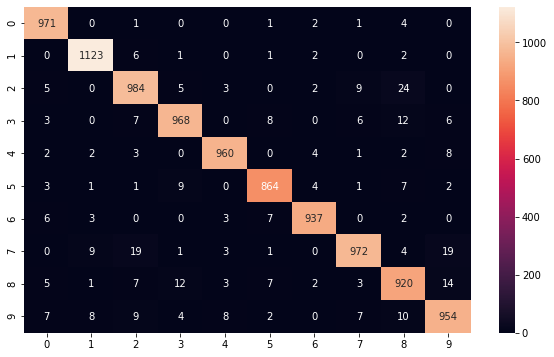

In [ ]:
cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d');

In [ ]:
print("Accuracy score",accuracy_score(y_test, y_predicted))

Accuracy score 0.9653


O resultado acima significa que seus classificador está correto em aproximadamente 96,5% das vezes que você pede para ele classificar um dígito escrito a mão similar aos que existem no dataset MNIST.

**Critical discussion**

Dada a pequena quantidade de tempo que nós demos ao AutoSklearn, os resultados ainda são muito bons se você não tem nenhum tipo de background em visão computacional.

Este é exatamente o tipo de cenário pro qual AutoML foi pensado: alguém que tem pouco background em aprendizado de máquina e/ou na aplicação.

No entanto, se você tiver conhecimento especializado, você sabe que é possível obter uma acurácia de 97% usando SVM e de mais de 99% usando deep learning.

Além disso, configurar o AutoSklearnClassifier envolve diversas decisões que afetam diretamente na qualidade dos resultados, como a estratégia de validação.

Auto-sklearn 2.0 inclui as pesquisas mais recentes em configuração automatica de algoritmos e contém uma grande quantidade de melhorias como aumento de velocidade no ajuste do sistema de AutoML

- https://arxiv.org/abs/2007.04074
- https://www.automl.org/auto-sklearn-2-0-the-next-generation/

## AutoKeras <a class="anchor" id="autokeras"></a>

https://autokeras.com/

In [1]:
#!pip install git+https://github.com/keras-team/keras-tuner.git@1.0.2rc4
#!pip install autokeras

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.python.keras.utils.data_utils import Sequence
import autokeras as ak

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)  # (60000, 28, 28)
print(y_train.shape)  # (60000,)
print(y_train[:3])  # array([7, 2, 1], dtype=uint8)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
[5 0 4]


É recomendado que se tenha mais tentativas para datasets mais complicados. Mas como estamos numa demonstração rápida, setamos max_trials para 1 e também epochs para 10. Você pode deixar epochs não especificada para um número adaptativo de epochs.

In [4]:
# Initialize the image classifier.
clf = ak.ImageClassifier(
    overwrite=True,
    max_trials=1)
# Feed the image classifier with training data.
clf.fit(x_train, y_train, epochs=10)

Trial 1 Complete [00h 21m 03s]
val_loss: 0.043451834470033646

Best val_loss So Far: 0.043451834470033646
Total elapsed time: 00h 21m 03s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
1875/1875 [==============================] - 147s 78ms/step - loss: 0.1577 - accuracy: 0.9520
Epoch 2/10
1875/1875 [==============================] - 148s 79ms/step - loss: 0.0736 - accuracy: 0.9775
Epoch 3/10
1875/1875 [==============================] - 148s 79ms/step - loss: 0.0579 - accuracy: 0.9822
Epoch 4/10
1875/1875 [==============================] - 147s 78ms/step - loss: 0.0496 - accuracy: 0.9839
Epoch 5/10
1875/1875 [==============================] - 146s 78ms/step - loss: 0.0437 - accuracy: 0.9859
Epoch 6/10
1875/1875 [==============================] - 148s 79ms/step - loss: 0.0409 - accuracy: 0.9870
Epoch 7/10
1875/1875 [==============================] - 147s 78ms/step - loss: 0.0365 - accuracy: 0.9884
Epoch 8/10
1875/1875 [==============================] - 147s 78ms/step - loss: 0.0332 - a

In [6]:
# Predict with the best model.
predicted_y = clf.predict(x_test)
print(predicted_y)

[['7']
 ['2']
 ['1']
 ...
 ['4']
 ['5']
 ['6']]


In [5]:
# Evaluate the best model with testing data.
print(clf.evaluate(x_test, y_test))

313/313 [==============================] - 7s 21ms/step - loss: 0.0406 - accuracy: 0.9878
[0.04056058079004288, 0.9878000020980835]


Por padrão, AutoKeras usa os últimos 20% de dados de treino para validação. Mas é possível usar validation_split para especificar a porcentagem.

In [ ]:
clf.fit(
    x_train,
    y_train,
    # Split the training data and use the last 15% as validation data.
    validation_split=0.15,
    epochs=10,
)

Você também pode passar seu conjunto de validação:

In [ ]:
split = 50000
x_val = x_train[split:]
y_val = y_train[split:]
x_train = x_train[:split]
y_train = y_train[:split]
clf.fit(
    x_train,
    y_train,
    # Use your own validation set.
    validation_data=(x_val, y_val),
    epochs=10,
)

Se você tem uma intuição de como a arquitetura do seu problema deve ser é possível construir um modelo customizado: https://autokeras.com/tutorial/customized/

## TPOT  <a class="anchor" id="tpot"></a>

https://epistasislab.github.io/tpot/

TPOT is Tree-Based Pipeline Optimization Tool for automating machine learning.

In [ ]:
#!conda install numpy scipy scikit-learn pandas joblib pytorch -y
#!pip install deap update_checker tqdm stopit
#!pip install xgboost
#!pip install dask[delayed] dask[dataframe] dask-ml fsspec>=0.3.3 distributed>=2.10.0
#!pip install scikit-mdr skrebate
#!pip install tpot

In [ ]:
from tpot import TPOTClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,
                                                    train_size=0.75, test_size=0.25)

pipeline_optimizer = TPOTClassifier(generations=5, population_size=20, cv=5,
                                    random_state=42, verbosity=2)
pipeline_optimizer.fit(X_train, y_train)
print(pipeline_optimizer.score(X_test, y_test))
pipeline_optimizer.export('tpot_exported_pipeline.py')


Generation 1 - Current best internal CV score: 0.9836568910918352

Generation 2 - Current best internal CV score: 0.98960484648217

Generation 3 - Current best internal CV score: 0.98960484648217

Generation 4 - Current best internal CV score: 0.98960484648217

Generation 5 - Current best internal CV score: 0.98960484648217

Best pipeline: KNeighborsClassifier(Normalizer(input_matrix, norm=l1), n_neighbors=3, p=2, weights=distance)
0.9911111111111112


In [2]:
!cat tpot_exported_pipeline.py

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from tpot.export_utils import set_param_recursive

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=42)

# Average CV score on the training set was: 0.98960484648217
exported_pipeline = make_pipeline(
    Normalizer(norm="l1"),
    KNeighborsClassifier(n_neighbors=3, p=2, weights="distance")
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 42)

exported_pipeline.fit(training_features, tr

Pipeline exportado:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from tpot.export_utils import set_param_recursive

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=42)

# Average CV score on the training set was: 0.98960484648217
exported_pipeline = make_pipeline(
    Normalizer(norm="l1"),
    KNeighborsClassifier(n_neighbors=3, p=2, weights="distance")
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 42)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

## H2O AutoML  <a class="anchor" id="h2oautoml"></a>

http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html

In [ ]:
#!pip install requests
#!pip install tabulate
#!pip install "colorama>=0.3.8"
#!pip install future
#!pip uninstall h2o -y
#!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

In [ ]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

# Import a sample binary outcome train/test set into H2O
train = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_train_10k.csv")
test = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_test_5k.csv")

# Identify predictors and response
x = train.columns
y = "response"
x.remove(y)

# For binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x, y=y, training_frame=train)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

# model_id                                                  auc    logloss    mean_per_class_error      rmse       mse
# ---------------------------------------------------  --------  ---------  ----------------------  --------  --------
# StackedEnsemble_AllModels_AutoML_20181212_105540     0.789801   0.551109                0.333174  0.43211   0.186719
# StackedEnsemble_BestOfFamily_AutoML_20181212_105540  0.788425   0.552145                0.323192  0.432625  0.187165
# XGBoost_1_AutoML_20181212_105540                     0.784651   0.55753                 0.325471  0.434949  0.189181
# XGBoost_grid_1_AutoML_20181212_105540_model_4        0.783523   0.557854                0.318819  0.435249  0.189441
# XGBoost_grid_1_AutoML_20181212_105540_model_3        0.783004   0.559613                0.325081  0.435708  0.189841
# XGBoost_2_AutoML_20181212_105540                     0.78136    0.55888                 0.347074  0.435907  0.190015
# XGBoost_3_AutoML_20181212_105540                     0.780847   0.559589                0.330739  0.43613   0.190209
# GBM_5_AutoML_20181212_105540                         0.780837   0.559903                0.340848  0.436191  0.190263
# GBM_2_AutoML_20181212_105540                         0.780036   0.559806                0.339926  0.436415  0.190458
# GBM_1_AutoML_20181212_105540                         0.779827   0.560857                0.335096  0.436616  0.190633
# GBM_3_AutoML_20181212_105540                         0.778669   0.56179                 0.325538  0.437189  0.191134
# XGBoost_grid_1_AutoML_20181212_105540_model_2        0.774411   0.575017                0.322811  0.4427    0.195984
# GBM_4_AutoML_20181212_105540                         0.771426   0.569712                0.33742   0.44107   0.194543
# GBM_grid_1_AutoML_20181212_105540_model_1            0.769752   0.572583                0.344331  0.442452  0.195764
# GBM_grid_1_AutoML_20181212_105540_model_2            0.754366   0.918567                0.355855  0.496638  0.246649
# DRF_1_AutoML_20181212_105540                         0.742892   0.595883                0.355403  0.452774  0.205004
# XRT_1_AutoML_20181212_105540                         0.742091   0.599346                0.356583  0.453117  0.205315
# DeepLearning_grid_1_AutoML_20181212_105540_model_2   0.741795   0.601497                0.368291  0.454904  0.206937
# XGBoost_grid_1_AutoML_20181212_105540_model_1        0.693554   0.620702                0.40588   0.465791  0.216961
# DeepLearning_1_AutoML_20181212_105540                0.69137    0.637954                0.409351  0.47178   0.222576
# DeepLearning_grid_1_AutoML_20181212_105540_model_1   0.690084   0.661794                0.418469  0.476635  0.227181
# GLM_grid_1_AutoML_20181212_105540_model_1            0.682648   0.63852                 0.397234  0.472683  0.223429
#
# [22 rows x 6 columns]

# The leader model is stored here
aml.leader

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,2 mins 20 secs
H2O_cluster_timezone:,America/Fortaleza
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.3
H2O_cluster_version_age:,1 month and 7 days
H2O_cluster_name:,H2O_from_python_andrade_smqraw
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.442 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_AutoML_20201104_211526

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.08230591333650077
RMSE: 0.2868900718681299
LogLoss: 0.30820172898458503
Null degrees of freedom: 9999
Residual degrees of freedom: 9985
Null deviance: 13828.11338742424
Residual deviance: 6164.034579691701
AIC: 6194.034579691701
AUC: 0.9823180691988812
AUCPR: 0.9841852507322202
Gini: 0.9646361383977624

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4857601327017959: 


,,0,1,Error,Rate
0,0,4231.0,474.0,0.1007,(474.0/4705.0)
1,1,245.0,5050.0,0.0463,(245.0/5295.0)
2,Total,4476.0,5524.0,0.0719,(719.0/10000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.485760,0.933543,207.0
1,max f2,0.411797,0.956813,235.0
2,max f0point5,0.595266,0.942026,167.0
3,max accuracy,0.507957,0.928600,199.0
4,max precision,0.943973,1.000000,0.0
5,max recall,0.229484,1.000000,313.0
6,max specificity,0.943973,1.000000,0.0
7,max absolute_mcc,0.507957,0.856715,199.0
8,max min_per_class_accuracy,0.528020,0.926461,191.0
9,max mean_per_class_accuracy,0.507957,0.927723,199.0



Gains/Lift Table: Avg response rate: 52,95 %, avg score: 53,01 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.01,0.924408,1.888574,1.888574,1.000,0.931274,1.000000,0.931274,0.018886,0.018886,88.857413,88.857413,0.018886
1,2,0.02,0.918895,1.888574,1.888574,1.000,0.921491,1.000000,0.926382,0.018886,0.037771,88.857413,88.857413,0.037771
2,3,0.03,0.914332,1.888574,1.888574,1.000,0.916532,1.000000,0.923099,0.018886,0.056657,88.857413,88.857413,0.056657
3,4,0.04,0.911263,1.888574,1.888574,1.000,0.912749,1.000000,0.920511,0.018886,0.075543,88.857413,88.857413,0.075543
4,5,0.05,0.906982,1.888574,1.888574,1.000,0.909219,1.000000,0.918253,0.018886,0.094429,88.857413,88.857413,0.094429
5,6,0.10,0.888375,1.888574,1.888574,1.000,0.897225,1.000000,0.907739,0.094429,0.188857,88.857413,88.857413,0.188857
6,7,0.15,0.866791,1.888574,1.888574,1.000,0.877863,1.000000,0.897780,0.094429,0.283286,88.857413,88.857413,0.283286
7,8,0.20,0.842917,1.888574,1.888574,1.000,0.855159,1.000000,0.887125,0.094429,0.377715,88.857413,88.857413,0.377715
8,9,0.30,0.778193,1.875354,1.884167,0.993,0.812120,0.997667,0.862123,0.187535,0.565250,87.535411,88.416745,0.563762
9,10,0.40,0.694063,1.779037,1.857885,0.942,0.739028,0.983750,0.831350,0.177904,0.743154,77.903683,85.788480,0.729339




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.18747975111109255
RMSE: 0.432989319857999
LogLoss: 0.5532473706141514
Null degrees of freedom: 9999
Residual degrees of freedom: 9985
Null deviance: 13829.717313823494
Residual deviance: 11064.947412283029
AIC: 11094.947412283029
AUC: 0.7881794727446241
AUCPR: 0.8056030828855565
Gini: 0.5763589454892482

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3572128562131419: 


,,0,1,Error,Rate
0,0,2349.0,2356.0,0.5007,(2356.0/4705.0)
1,1,710.0,4585.0,0.1341,(710.0/5295.0)
2,Total,3059.0,6941.0,0.3066,(3066.0/10000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.357213,0.749428,270.0
1,max f2,0.154289,0.860443,361.0
2,max f0point5,0.628993,0.741711,148.0
3,max accuracy,0.532135,0.713900,192.0
4,max precision,0.943589,1.000000,0.0
5,max recall,0.074563,1.000000,393.0
6,max specificity,0.943589,1.000000,0.0
7,max absolute_mcc,0.532135,0.427656,192.0
8,max min_per_class_accuracy,0.527772,0.713071,194.0
9,max mean_per_class_accuracy,0.532135,0.714174,192.0



Gains/Lift Table: Avg response rate: 52,95 %, avg score: 52,94 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.01,0.919113,1.869688,1.869688,0.990,0.927806,0.990000,0.927806,0.018697,0.018697,86.968839,86.968839,0.018484
1,2,0.02,0.909592,1.756374,1.813031,0.930,0.913640,0.960000,0.920723,0.017564,0.036261,75.637394,81.303116,0.034560
2,3,0.03,0.903431,1.831917,1.819326,0.970,0.906446,0.963333,0.915964,0.018319,0.054580,83.191690,81.932641,0.052242
3,4,0.04,0.896547,1.813031,1.817753,0.960,0.899768,0.962500,0.911915,0.018130,0.072710,81.303116,81.775260,0.069522
4,5,0.05,0.890749,1.605288,1.775260,0.850,0.893466,0.940000,0.908225,0.016053,0.088763,60.528801,77.525968,0.082387
5,6,0.10,0.863161,1.703494,1.739377,0.902,0.877204,0.921000,0.892715,0.085175,0.173938,70.349386,73.937677,0.157147
6,7,0.15,0.831390,1.612842,1.697199,0.854,0.848315,0.898667,0.877915,0.080642,0.254580,61.284230,69.719862,0.222274
7,8,0.20,0.797748,1.567517,1.664778,0.830,0.814719,0.881500,0.862116,0.078376,0.332956,56.751653,66.477809,0.282584
8,9,0.30,0.721859,1.357885,1.562480,0.719,0.760917,0.827333,0.828383,0.135788,0.468744,35.788480,56.248033,0.358648
9,10,0.40,0.631105,1.271010,1.489613,0.673,0.677541,0.788750,0.790672,0.127101,0.595845,27.101039,48.961284,0.416249


In [ ]:
# To generate predictions on a test set, you can make predictions
# directly on the `"H2OAutoML"` object or on the leader model
# object directly
preds = aml.predict(test)

# or:
preds = aml.leader.predict(test)

stackedensemble prediction progress: |████████████████████████████████████| 100%
stackedensemble prediction progress: |████████████████████████████████████| 100%


In [ ]:
lb = h2o.automl.get_leaderboard(aml, extra_columns = 'ALL')
lb

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms
StackedEnsemble_AllModels_AutoML_20201104_211526,0.788179,0.553247,0.805603,0.317416,0.432989,0.18748,1029,0.053964
StackedEnsemble_BestOfFamily_AutoML_20201104_211526,0.786582,0.554663,0.804311,0.316731,0.433675,0.188074,621,0.026275
GBM_5_AutoML_20201104_211526,0.78219,0.558353,0.801738,0.319658,0.435512,0.18967,956,0.005492
GBM_2_AutoML_20201104_211526,0.777673,0.562514,0.796364,0.334056,0.437583,0.191479,827,0.004816
GBM_1_AutoML_20201104_211526,0.777294,0.562744,0.799184,0.356261,0.437727,0.191605,863,0.004576
GBM_3_AutoML_20201104_211526,0.775488,0.564794,0.794892,0.327971,0.438722,0.192477,770,0.004737
GBM_grid__1_AutoML_20201104_211526_model_1,0.772926,0.568181,0.791195,0.322808,0.439997,0.193598,521,0.004969
GBM_4_AutoML_20201104_211526,0.77248,0.569483,0.792582,0.336913,0.440873,0.194369,1155,0.005571
GBM_grid__1_AutoML_20201104_211526_model_2,0.77049,0.569351,0.788633,0.369523,0.440822,0.194324,1109,0.00738
DRF_1_AutoML_20201104_211526,0.764975,0.5801,0.782338,0.336001,0.445222,0.198222,2013,0.007316


## PyCaret  <a class="anchor" id="pycaret"></a>

https://pycaret.org/automl/

Biblioteca que busca automatizar o fluxo de trabalho de machine learning. É uma ferramenta de gerenciamento de modelos que busca acelerar o ciclo de experimentação de ML e ajudar cientistas de dados a serem mais eficientes e produtivos.

https://www.kdnuggets.com/2020/08/build-automl-pycaret.html

In [ ]:
#!pip install pycaret[full]

In [20]:
# loading dataset 
from pycaret.datasets import get_data 
data = get_data('diabetes') 

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
# initializing setup 
from pycaret.classification import *
clf1 = setup(data, target = 'Class variable') 

,Description,Value
0,session_id,1673
1,Target,Class variable
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(768, 9)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [22]:
# compare all baseline models and select top 5
top5 = compare_models(n_select=5) 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.7763,0.8432,0.7401,0.7741,0.7714,0.4936,0.4992,1.122
lr,Logistic Regression,0.7725,0.8191,0.7265,0.7682,0.7645,0.4748,0.4832,0.307
lightgbm,Light Gradient Boosting Machine,0.7652,0.8105,0.7324,0.7649,0.7611,0.4733,0.4788,0.023
lda,Linear Discriminant Analysis,0.7651,0.8143,0.7182,0.759,0.7569,0.4574,0.4645,0.007
rf,Random Forest Classifier,0.7633,0.8292,0.714,0.7626,0.7532,0.4509,0.4647,0.092
ridge,Ridge Classifier,0.7632,0,0.7156,0.757,0.7545,0.4519,0.4596,0.006
gbc,Gradient Boosting Classifier,0.7558,0.823,0.7159,0.7518,0.7492,0.4431,0.4493,0.039
xgboost,Extreme Gradient Boosting,0.7427,0.7998,0.7116,0.7431,0.7407,0.4304,0.4336,0.144
ada,Ada Boost Classifier,0.7334,0.8056,0.6954,0.7299,0.7289,0.4003,0.4041,0.033
et,Extra Trees Classifier,0.726,0.7963,0.6755,0.7205,0.7161,0.369,0.3778,0.081


In [23]:
# tune top 5 base models
tuned_top5 = [tune_model(i) for i in top5]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8333,0.9113,0.8233,0.8358,0.8343,0.6389,0.6394
1,0.7407,0.8165,0.7639,0.7846,0.7466,0.4815,0.5041
2,0.7778,0.818,0.7444,0.7739,0.7747,0.5008,0.5025
3,0.8519,0.9248,0.8617,0.8664,0.8544,0.6901,0.6985
4,0.7593,0.8602,0.7421,0.7625,0.7606,0.4785,0.4788
5,0.7778,0.8045,0.7564,0.7778,0.7778,0.5128,0.5128
6,0.7963,0.8617,0.8068,0.8179,0.8003,0.5787,0.5896
7,0.7358,0.8143,0.6921,0.7299,0.7317,0.3948,0.3963
8,0.7736,0.8266,0.7771,0.7898,0.7773,0.5296,0.5362
9,0.6981,0.7554,0.6834,0.706,0.7011,0.3585,0.3597


In [24]:
# ensemble top 5 tuned models
bagged_top5 = [ensemble_model(i) for i in tuned_top5]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8148,0.9023,0.797,0.8148,0.8148,0.594,0.594
1,0.7222,0.812,0.7256,0.7454,0.7277,0.4255,0.4336
2,0.7778,0.8211,0.7444,0.7739,0.7747,0.5008,0.5025
3,0.8704,0.9353,0.8759,0.8795,0.8722,0.7257,0.7308
4,0.7407,0.8647,0.7158,0.7407,0.7407,0.4316,0.4316
5,0.7963,0.8316,0.7707,0.7942,0.795,0.5479,0.5484
6,0.8148,0.8677,0.8331,0.8427,0.8188,0.6213,0.638
7,0.7547,0.8048,0.7198,0.7517,0.7529,0.4457,0.4461
8,0.7736,0.8638,0.7539,0.7736,0.7736,0.5077,0.5077
9,0.6792,0.7477,0.6803,0.703,0.6852,0.3409,0.3475


In [25]:
# blend top 5 base models 
blender = blend_models(estimator_list = top5) 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8333,0.9188,0.7992,0.8317,0.8296,0.6209,0.6259
1,0.7222,0.809,0.6895,0.7191,0.7204,0.3836,0.3839
2,0.7593,0.8241,0.694,0.7577,0.743,0.4236,0.4456
3,0.7593,0.9248,0.718,0.7536,0.7539,0.4524,0.4561
4,0.7963,0.8602,0.7466,0.795,0.7877,0.5248,0.5375
5,0.8333,0.8376,0.7992,0.8317,0.8296,0.6209,0.6259
6,0.8333,0.8722,0.8113,0.8318,0.8323,0.6301,0.6307
7,0.7358,0.8079,0.6651,0.7257,0.7199,0.3592,0.3736
8,0.7358,0.8483,0.7012,0.7309,0.7323,0.412,0.4135
9,0.6792,0.7074,0.6339,0.6698,0.6723,0.2775,0.2797


In [26]:
# select best model 
best = automl(optimize='Recall')

In [27]:
best

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=8, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0005,
                       min_impurity_split=None, min_samples_leaf=2,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       n_estimators=210, n_jobs=-1, oob_score=False,
                       random_state=1673, verbose=0, warm_start=False)

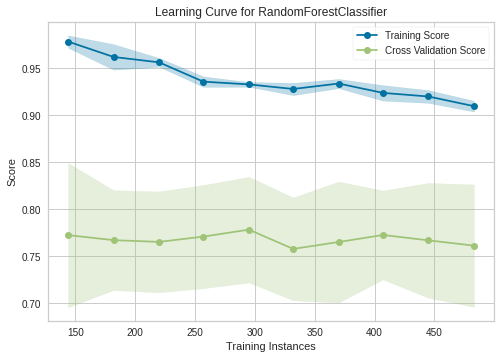

In [28]:
plot_model(estimator=best, plot='learning')

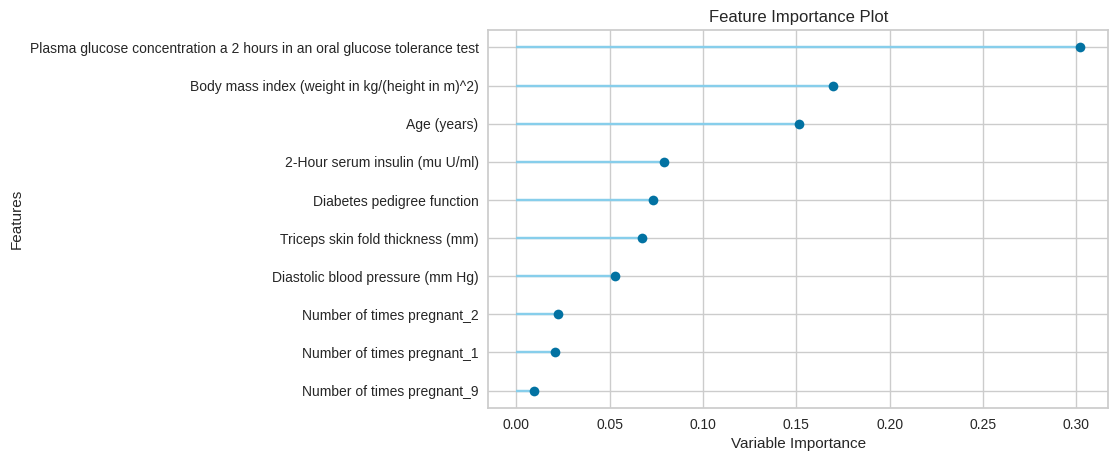

In [29]:
plot_model(estimator=best, plot='feature')

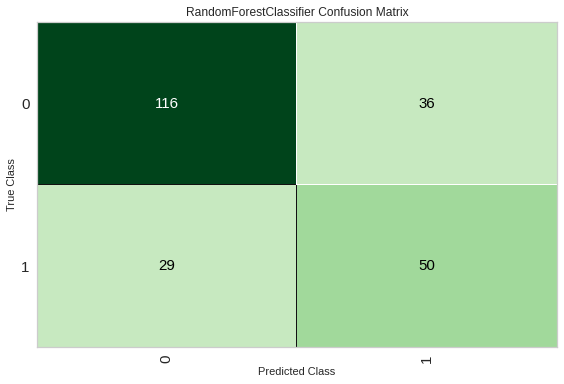

In [30]:
plot_model(estimator=best, plot='confusion_matrix')

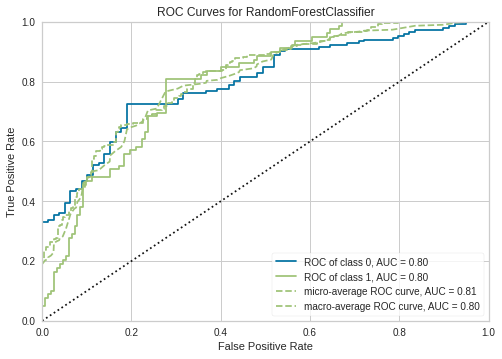

In [32]:
# AUC Curve for Classifications models
plot_model(estimator=best, plot='auc')

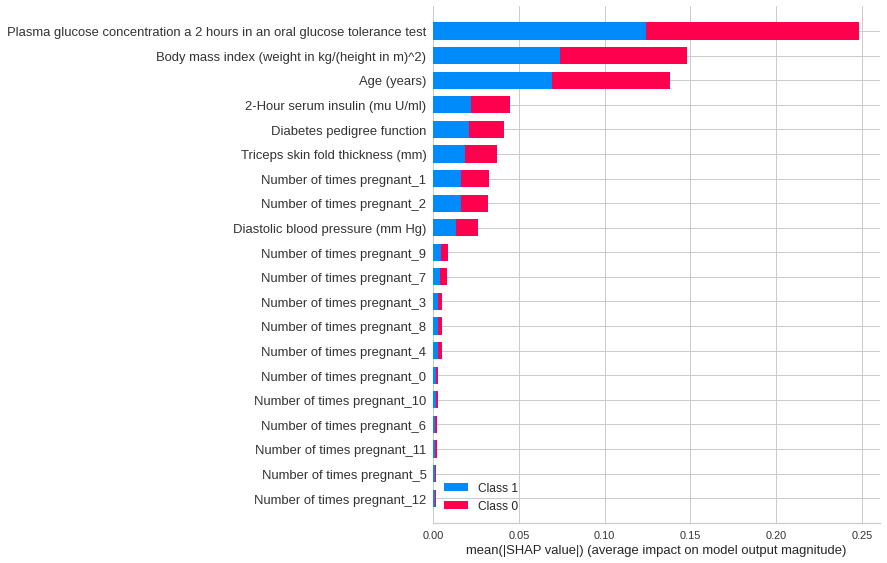

In [33]:
# Understand which feature had most role to play in the classification task
interpret_model(best)

In [34]:
save_model(best, 'best_model_diabetes')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='Class variable',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeri...
                                         class_weight='balanced_subsample',
                                         criterion='entropy', max_depth=8,
                                         max_features='log2',
                     